Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB # import library naive_bayes 
from sklearn.linear_model import LogisticRegression #import library NaiveBayes 
from sklearn.neighbors import KNeighborsClassifier #import library K Nearest Neighbors
from sklearn.svm import SVC #import library Support Vector machine 
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Reading The Dataset By Using Pandas 
credit_card_ds = pd.read_csv('creditcard.csv')


In [3]:
#Show first 10 Rows of the dataset
credit_card_ds.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Last 10 Rows of the dataset
credit_card_ds.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#dataset informations
credit_card_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Before using dataset we need to check if there any missing value this called preprocessing 
credit_card_ds.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# We Watch that V1 Include 24 Missing value ,We need to get rid of missing value by Calculate Mean or drop Row 
#credit_card_pre_null=credit_card_ds.fillna(value=credit_card_ds['V1'].mean())
#credit_card_pre_null

In [8]:
#Check again if dataset include missing value or not 
#credit_card_ds.isnull().sum()

Congratulations for you no missing Value ♥

In [9]:
#we need in dataset number of 0 and 1, you should know that 0 represent  no fraud and 1 represent fraud
credit_card_ds['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# separating the dataset for analysis {legal,illegal}
#legal = credit_card_ds[credit_card_ds.Class == 0]
#print(legal.shape)
#illegal = credit_card_ds[credit_card_ds.Class == 1]
#print(illegal.shape)


In [11]:
#Print Shape dataset for legal and illegal To know how many for every one


X = credit_card_ds.drop(columns='Class', axis=1)

#pd.DataFrame(X)

Y = credit_card_ds['Class']
 
pd.DataFrame(X)

    
#new_dataset = pd.concat([legal_sample, illegal], axis=0)
#print(Y.shape)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_new= sc.fit_transform(X)
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new , Y , test_size=0.20, stratify=Y, random_state=0)

159949    0
15295     0
260353    0
209407    0
91229     0
         ..
207242    0
239361    0
211932    0
70523     0
97767     0
Name: Class, Length: 56962, dtype: int64
0    227451
1       394
Name: Class, dtype: int64


<AxesSubplot:>

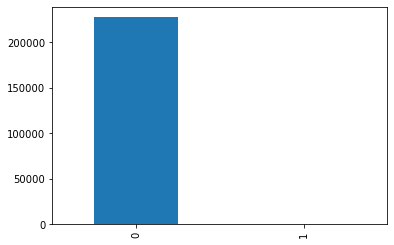

In [14]:
print(Y_test)
print(Y_train.value_counts())
Y_train.value_counts().sort_index().plot.bar()

0    788
1    394
Name: Class, dtype: int64
0    788
1    788
Name: Class, dtype: int64


<AxesSubplot:>

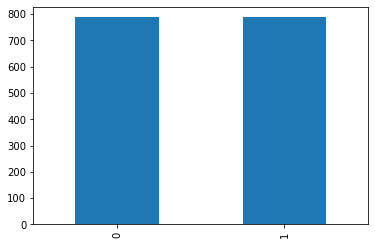

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0) 

X_train_rus, Y_train_rus = rus.fit_resample(X_train,Y_train)

print(Y_train_rus.value_counts())

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)

X_train_balanced, y_train_balanced = ros.fit_resample(X_train_rus, Y_train_rus)

#print(y_train_rus1.value_counts())
print(y_train_balanced.value_counts())
y_train_balanced.value_counts().sort_index().plot.bar()

You create a new dataset consisting of an equal number of zeros and ones, or the type of operation is legal and illegal

In [16]:
#print(X)
print('-------------------------------------------------------------------------------------------')
#print(Y)

-------------------------------------------------------------------------------------------


In [17]:
#show how many row train and how many row for test
#print(X.shape, X_train.shape, X_test.shape)

In [18]:
from sklearn.naive_bayes import GaussianNB # import library naive_bayes 
from sklearn.linear_model import LogisticRegression #import library NaiveBayes 
from sklearn.neighbors import KNeighborsClassifier #import library K Nearest Neighbors
from sklearn.svm import SVC #import library Support Vector machine 
from sklearn.ensemble import RandomForestClassifier

# using Model Training Logistic Regression
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = SVC(kernel='linear', random_state = 0, C=10)
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 =  RandomForestClassifier(n_estimators = 5 , criterion = 'entropy', random_state = 10)


#Traing Models
model1.fit(X_train_balanced, y_train_balanced )#training the Logistic Regression Model with Training Data
model2.fit(X_train_balanced, y_train_balanced )#training the NaiveBayes  Model with Training Data
model3.fit(X_train_balanced, y_train_balanced )#training the K Nearest Neighbors Model with Training Data
model4.fit(X_train_balanced, y_train_balanced )#training the Support Vector machine  Model with Training Data

model5.fit(X_train_balanced, y_train_balanced )


RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=10)

In [19]:
#calculcate Accuracy on Training data
X_train_prediction1 = model1.predict(X_train_balanced)
training_data_accuracy1 = accuracy_score(X_train_prediction1, y_train_balanced)

X_train_prediction2 = model2.predict(X_train_balanced)
training_data_accuracy2 = accuracy_score(X_train_prediction2, y_train_balanced)

X_train_prediction3 = model3.predict(X_train_balanced)
training_data_accuracy3 = accuracy_score(X_train_prediction3, y_train_balanced)

X_train_prediction4 = model4.predict(X_train_balanced)
training_data_accuracy4 = accuracy_score(X_train_prediction4, y_train_balanced)

X_train_prediction5 = model5.predict(X_train_balanced)
training_data_accuracy5 = accuracy_score(X_train_prediction5, y_train_balanced)

print('Accuracy on Training data_LogisticRegression : ', training_data_accuracy1)
print('Accuracy on Training data_NaiveBayes : ', training_data_accuracy2)
print('Accuracy on Training data_SVC : ', training_data_accuracy3)
print('Accuracy on Training data_Knn : ', training_data_accuracy4)
print('Accuracy on Training data_RandomForest : ', training_data_accuracy5)

Accuracy on Training data_LogisticRegression :  0.9524111675126904
Accuracy on Training data_NaiveBayes :  0.9086294416243654
Accuracy on Training data_SVC :  0.9644670050761421
Accuracy on Training data_Knn :  0.9676395939086294
Accuracy on Training data_RandomForest :  0.9974619289340102


In [20]:
#calculcate Accuracy score on Test Data
X_test_prediction1 = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)

X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

X_test_prediction3 = model3.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction3, Y_test)

X_test_prediction4 = model4.predict(X_test)
test_data_accuracy4 = accuracy_score(X_test_prediction4, Y_test)

X_test_prediction5 = model5.predict(X_test)
test_data_accuracy5 = accuracy_score(X_test_prediction5, Y_test)


print('Accuracy score on Test Data LogisticRegression: ', test_data_accuracy1)
print('Accuracy score on Test Data NaiveBayes : ', test_data_accuracy2)
print('Accuracy score on Test Data SVC : ', test_data_accuracy3)
print('Accuracy score on Test Data  Knn : ', test_data_accuracy4)
print('Accuracy score on Test Data RandomForest : ', test_data_accuracy5)

Accuracy score on Test Data LogisticRegression:  0.9696113198272532
Accuracy score on Test Data NaiveBayes :  0.9757557670025631
Accuracy score on Test Data SVC :  0.9693830975035989
Accuracy score on Test Data  Knn :  0.9655910958182649
Accuracy score on Test Data RandomForest :  0.9729819879919946


In [21]:
cm1 = confusion_matrix(Y_test, X_test_prediction1)
print('LogisticRegression:')
print(Y_test.shape)
pd.DataFrame(cm1)

LogisticRegression:
(56962,)


,0,1
0,55145,1719
1,12,86


In [22]:
cm2 = confusion_matrix(Y_test, X_test_prediction2)
print('NaiveBayes')
pd.DataFrame(cm2)

NaiveBayes


,0,1
0,55501,1363
1,18,80


In [23]:

cm3 = confusion_matrix(Y_test, X_test_prediction3)
print('SVC')
pd.DataFrame(cm3)

SVC


,0,1
0,55131,1733
1,11,87


In [24]:
cm4 = confusion_matrix(Y_test, X_test_prediction4)
print('Knn')
pd.DataFrame(cm4)


Knn


,0,1
0,54913,1951
1,9,89


In [25]:
cm5 = confusion_matrix(Y_test, X_test_prediction5)
print('RandomForest : ')
pd.DataFrame(cm5)

RandomForest : 


,0,1
0,55335,1529
1,10,88
